# Scraping Company Revenue Data from 'Wikipedia' Web-Page

We'll scrape the revenue data tables from the Wikipedia page [_"List of largest companies in the United States by revenue"_](https://en.wikipedia.org/wiki/List_of_largest_companies_in_the_United_States_by_revenue), load the data into Pandas DataFrames, and export them to CSV files. so that the data can be easily accessed, analyzed, or reused in future projects or analyses without needing to scrape the webpage again.

## 1. Get and Parse HTML 

In [1]:
# Import needed libraries
from bs4 import BeautifulSoup
import requests

In [2]:
# Fetch the web-page using its URL
url = 'https://en.wikipedia.org/wiki/List_of_largest_companies_in_the_United_States_by_revenue'
wiki_page = requests.get(url)

# Parse and print its HTML
html_wiki_page = BeautifulSoup(wiki_page.text, 'html')
#print(html_wiki_page)

Since the target data is stored within HTML tables, we will count the number of 'table' elements present on the page.

In [3]:
# Count of page tables
len(html_wiki_page.find_all('table'))

3

It's 3 tables, and that is what we actually see in the page.

#### Table 1: 
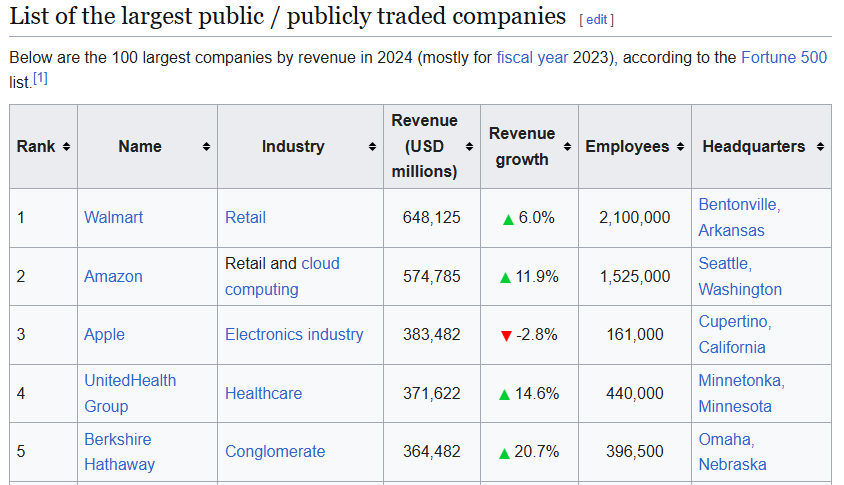

#### Table 2: 
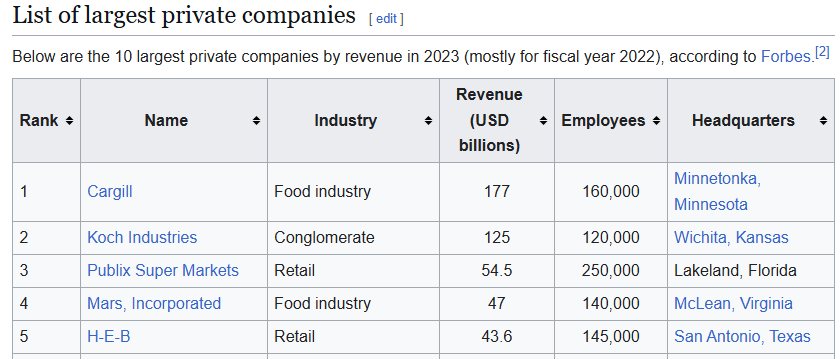

#### Table 3:
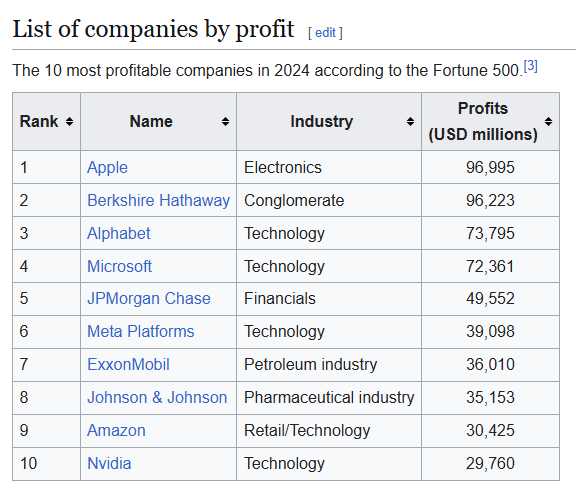

We will target the first 2 only which about revenue data. 

----------------------------------------------------

## 2. Extract 'table' Elements into Pandas DataFrames

### First, Table 1
While find() gets the first element, we will use it.

In [4]:
# Extract and print table 1
first_table = html_wiki_page.find('table')
print(first_table)

<table class="wikitable sortable">
<caption>
</caption>
<tbody><tr>
<th>Rank
</th>
<th>Name
</th>
<th>Industry
</th>
<th>Revenue <br/>(USD millions)
</th>
<th>Revenue growth
</th>
<th>Employees
</th>
<th>Headquarters
</th></tr>
<tr>
<td>1
</td>
<td><a href="/wiki/Walmart" title="Walmart">Walmart</a>
</td>
<td><a href="/wiki/Retail" title="Retail">Retail</a>
</td>
<td style="text-align:center;">648,125
</td>
<td style="text-align:center;"><span typeof="mw:File"><span title="Increase"><img alt="Increase" class="mw-file-element" data-file-height="300" data-file-width="300" decoding="async" height="11" src="//upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Increase2.svg/20px-Increase2.svg.png" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Increase2.svg/40px-Increase2.svg.png 2x" width="11"/></span></span> <span data-sort-value="7000300000000000000♠" style="display:none"></span> 6.0%
</td>
<td style="text-align:center;">2,100,000
</td>
<td><a href="/wiki/Bentonville,_Arkansa

In [5]:
# Extract and print table 1 headers
first_table_headers = first_table.find_all('th')
print(first_table_headers)

[<th>Rank
</th>, <th>Name
</th>, <th>Industry
</th>, <th>Revenue <br/>(USD millions)
</th>, <th>Revenue growth
</th>, <th>Employees
</th>, <th>Headquarters
</th>]


We see that headers are matching the target table headers as below.

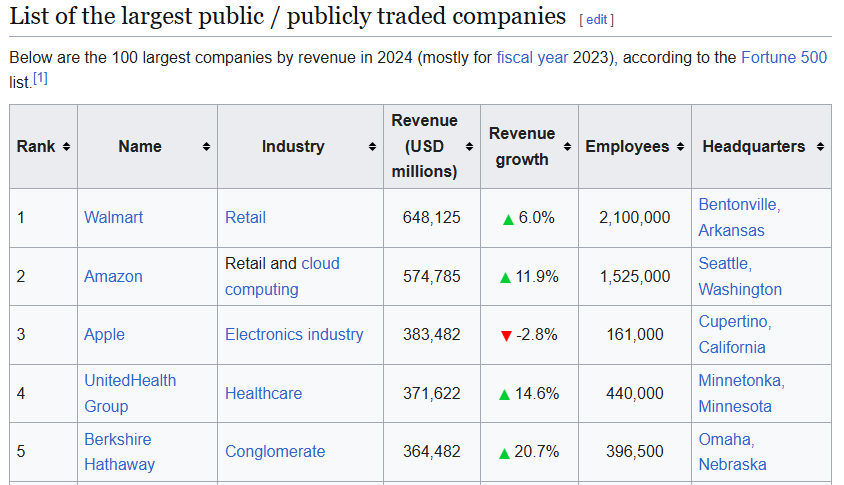

In [6]:
# Clean table 1 headers
cleaned_first_table_headers = [header.text.strip() for header in first_table_headers]
cleaned_first_table_headers

['Rank',
 'Name',
 'Industry',
 'Revenue (USD millions)',
 'Revenue growth',
 'Employees',
 'Headquarters']

Now, we are ready to save those cleaned headers in a dataframe.

In [7]:
# Import pandas for dataframe
import pandas as pd

# Create dataframe with those headers as column names
first_table_df = pd.DataFrame(columns = cleaned_first_table_headers)
first_table_df

,Rank,Name,Industry,Revenue (USD millions),Revenue growth,Employees,Headquarters


Now, we will extract the data rows.

In [8]:
# Extract and print table 1 data rows, including headers row
first_table_data = first_table.find_all('tr')
first_table_data

[<tr>
 <th>Rank
 </th>
 <th>Name
 </th>
 <th>Industry
 </th>
 <th>Revenue <br/>(USD millions)
 </th>
 <th>Revenue growth
 </th>
 <th>Employees
 </th>
 <th>Headquarters
 </th></tr>,
 <tr>
 <td>1
 </td>
 <td><a href="/wiki/Walmart" title="Walmart">Walmart</a>
 </td>
 <td><a href="/wiki/Retail" title="Retail">Retail</a>
 </td>
 <td style="text-align:center;">648,125
 </td>
 <td style="text-align:center;"><span typeof="mw:File"><span title="Increase"><img alt="Increase" class="mw-file-element" data-file-height="300" data-file-width="300" decoding="async" height="11" src="//upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Increase2.svg/20px-Increase2.svg.png" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Increase2.svg/40px-Increase2.svg.png 2x" width="11"/></span></span> <span data-sort-value="7000300000000000000♠" style="display:none"></span> 6.0%
 </td>
 <td style="text-align:center;">2,100,000
 </td>
 <td><a href="/wiki/Bentonville,_Arkansas" title="Bentonville, Arkansas">

In [9]:
# Extract, clean and add data rows to dataframe, exculding headers row
for row in first_table_data[1:]:
    row_data = row.find_all('td') # Extract
    cleaned_row_data = [value.text.strip() for value in row_data] # Clean
    
    df_length = len(first_table_df)
    first_table_df.loc[df_length] = cleaned_row_data # Add

In [10]:
# Print the resulting dataframe
first_table_df

,Rank,Name,Industry,Revenue (USD millions),Revenue growth,Employees,Headquarters
0,1,Walmart,Retail,"648,125",6.0%,"2,100,000","Bentonville, Arkansas"
1,2,Amazon,Retail and cloud computing,"574,785",11.9%,"1,525,000","Seattle, Washington"
2,3,Apple,Electronics industry,"383,482",-2.8%,"161,000","Cupertino, California"
3,4,UnitedHealth Group,Healthcare,"371,622",14.6%,"440,000","Minnetonka, Minnesota"
4,5,Berkshire Hathaway,Conglomerate,"364,482",20.7%,"396,500","Omaha, Nebraska"
...,...,...,...,...,...,...,...
95,96,TIAA,Financials,"45,735",11.8%,"16,023","New York City, New York"
96,97,CHS,Agriculture cooperative,"45,590",-4.6%,"10,609","Inver Grove Heights, Minnesota"
97,98,Bristol-Myers Squibb,Pharmaceutical industry,"45,006",-2.5%,"34,100","New York City, New York"
98,99,Dow Chemical Company,Chemical industry,"44,622",-21.6%,"35,900","Midland, Michigan"


That's our scraped data for the first 100 largest public companies in the US by revenue in 2024.

--------------------------------------------------------------------------------

### Second, Table 2
While find_all() gets all elements, we will use it.

In [11]:
# Extract and print table 2
second_table = html_wiki_page.find_all('table')[1]
print(second_table)

<table class="wikitable sortable">
<tbody><tr>
<th>Rank
</th>
<th>Name
</th>
<th>Industry
</th>
<th>Revenue <br/>(USD billions)
</th>
<th>Employees
</th>
<th>Headquarters
</th></tr>
<tr>
<td>1
</td>
<td><a href="/wiki/Cargill" title="Cargill">Cargill</a>
</td>
<td>Food industry
</td>
<td style="text-align:center;">177
</td>
<td style="text-align:center;">160,000
</td>
<td><a href="/wiki/Minnetonka,_Minnesota" title="Minnetonka, Minnesota">Minnetonka, Minnesota</a>
</td></tr>
<tr>
<td>2
</td>
<td><a class="mw-redirect" href="/wiki/Koch_Industries" title="Koch Industries">Koch Industries</a>
</td>
<td>Conglomerate
</td>
<td style="text-align:center;">125
</td>
<td style="text-align:center;">120,000
</td>
<td><a href="/wiki/Wichita,_Kansas" title="Wichita, Kansas">Wichita, Kansas</a>
</td></tr>
<tr>
<td>3
</td>
<td><a class="mw-redirect" href="/wiki/Publix_Super_Markets" title="Publix Super Markets">Publix Super Markets</a>
</td>
<td>Retail
</td>
<td style="text-align:center;">54.5
</td>


In [12]:
# Extract and print table 2 headers
second_table_headers = second_table.find_all('th')
print(second_table_headers)

[<th>Rank
</th>, <th>Name
</th>, <th>Industry
</th>, <th>Revenue <br/>(USD billions)
</th>, <th>Employees
</th>, <th>Headquarters
</th>]


We see that headers are matching the target table headers as below.

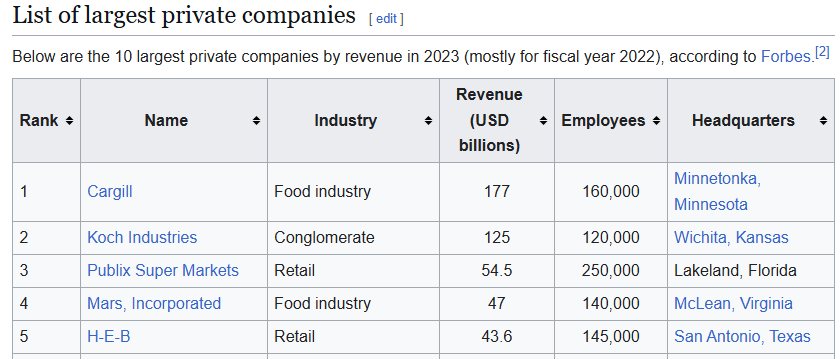

In [13]:
# Clean table 2 headers
cleaned_second_table_headers = [header.text.strip() for header in second_table_headers]
cleaned_second_table_headers

['Rank',
 'Name',
 'Industry',
 'Revenue (USD billions)',
 'Employees',
 'Headquarters']

Now, we are ready to save those cleaned headers in a dataframe.

In [14]:
# Create dataframe with those headers as column names
second_table_df = pd.DataFrame(columns = cleaned_second_table_headers)
second_table_df

,Rank,Name,Industry,Revenue (USD billions),Employees,Headquarters


Now, we will extract the data rows.

In [15]:
# Extract and print table 2 data rows, including headers row
second_table_data = second_table.find_all('tr')
second_table_data

[<tr>
 <th>Rank
 </th>
 <th>Name
 </th>
 <th>Industry
 </th>
 <th>Revenue <br/>(USD billions)
 </th>
 <th>Employees
 </th>
 <th>Headquarters
 </th></tr>,
 <tr>
 <td>1
 </td>
 <td><a href="/wiki/Cargill" title="Cargill">Cargill</a>
 </td>
 <td>Food industry
 </td>
 <td style="text-align:center;">177
 </td>
 <td style="text-align:center;">160,000
 </td>
 <td><a href="/wiki/Minnetonka,_Minnesota" title="Minnetonka, Minnesota">Minnetonka, Minnesota</a>
 </td></tr>,
 <tr>
 <td>2
 </td>
 <td><a class="mw-redirect" href="/wiki/Koch_Industries" title="Koch Industries">Koch Industries</a>
 </td>
 <td>Conglomerate
 </td>
 <td style="text-align:center;">125
 </td>
 <td style="text-align:center;">120,000
 </td>
 <td><a href="/wiki/Wichita,_Kansas" title="Wichita, Kansas">Wichita, Kansas</a>
 </td></tr>,
 <tr>
 <td>3
 </td>
 <td><a class="mw-redirect" href="/wiki/Publix_Super_Markets" title="Publix Super Markets">Publix Super Markets</a>
 </td>
 <td>Retail
 </td>
 <td style="text-align:center;">54.

In [16]:
# Extract, clean and add data rows to dataframe, exculding headers row
for row in second_table_data[1:]:
    row_data = row.find_all('td') # Extract
    cleaned_row_data = [value.text.strip() for value in row_data] # Clean
    
    df_length = len(second_table_df)
    second_table_df.loc[df_length] = cleaned_row_data # Add

In [17]:
# Print the resulting dataframe
second_table_df

,Rank,Name,Industry,Revenue (USD billions),Employees,Headquarters
0,1,Cargill,Food industry,177,"160,000","Minnetonka, Minnesota"
1,2,Koch Industries,Conglomerate,125,"120,000","Wichita, Kansas"
2,3,Publix Super Markets,Retail,54.5,"250,000","Lakeland, Florida"
3,4,"Mars, Incorporated",Food industry,47,"140,000","McLean, Virginia"
4,5,H-E-B,Retail,43.6,"145,000","San Antonio, Texas"
5,6,Reyes Holdings,Wholesaling,40,"36,000","Rosemont, Illinois"
6,7,Enterprise Holdings,Car rental,35,"90,000","Clayton, Missouri"
7,8,C&S Wholesale Grocers,Wholesaling,34.7,"15,000","Keene, New Hampshire"
8,9,Love's,Petroleum industry and Retail,26.5,"40,000","Oklahoma City, Oklahoma"
9,10,Southern Glazer's Wine and Spirits,Food industry,26.0,"24,000","Miramar, Florida"


That's our scraped data for the first 10 largest private companies in the US by revenue in 2023.

--------------------------------------------

## 3. Export to CSV Files

In [18]:
# Export to CSV files, exculding index column
first_table_df.to_csv('Public Companies Revenue Data.csv', index= False)
second_table_df.to_csv('Private Companies Revenue Data.csv', index= False)

# End!